In [1]:
import pandas as pd
import numpy as np
import os
import random
import datetime as dt
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib.dates as mdate
import matplotlib.ticker as mticker
from sklearn import preprocessing
%matplotlib inline
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False

In [2]:
ch_data= pd.read_csv('.\\data\\CH_data.csv', index_col='time', parse_dates=True) # 2011-01-01 00:00:00 -----2014-01-01 23:00:00
de_data= pd.read_csv('.\\data\\DE_data.csv', index_col='time', parse_dates=True)  # 2013-12-31 00:00:00 -----2016-12-31 23:00:00
at_data= pd.read_csv('.\\data\\AT_data.csv', index_col='time', parse_dates=True)  # 2012-12-31 00:00:00 -----2015-12-31 23:00:00

In [3]:
de_data.head()

,load,temperature,windspeed
time,,,
2008-01-01 00:00:00,50115.38462,-0.935,2.022659
2008-01-01 01:00:00,48023.07692,-1.033,1.932107
2008-01-01 02:00:00,46171.42857,-1.126,1.888118
2008-01-01 03:00:00,44921.97802,-1.255,1.889439
2008-01-01 04:00:00,43168.13187,-1.386,1.879193


# Ch dataset

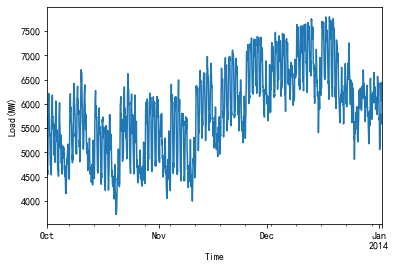

In [36]:
# 选三年的数据 原始图像 2011 2014
ch_data['load']['2013-10-01':'2014-01-01'].plot()
plt.xlabel('Time')
plt.ylabel('Load(MW)')
plt.show()

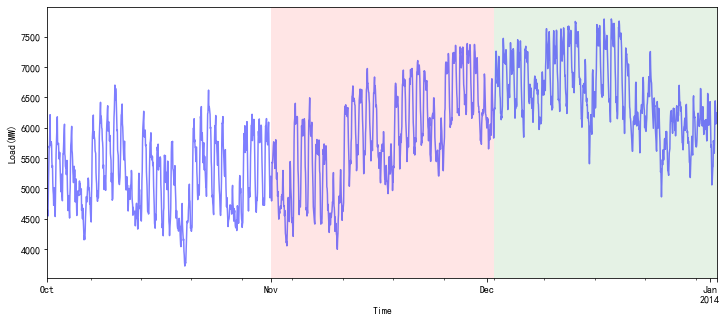

In [5]:
# 进行采样后的图像
ch_data['load']['2013-10-01':'2014-01-01'].resample('1H').last().plot(kind='line', alpha=0.5, use_index =True,figsize =(12,5), color='blue')
plt.axvspan('2013-12-02 00:00:00','2014-01-01  23:00:00',facecolor='green', alpha=0.1)
plt.axvspan('2013-11-01 00:00:00','2013-12-01  23:00:00',facecolor='red', alpha=0.1)
plt.xlabel('Time')
plt.ylabel('Load(MW)')
plt.show()

# DE dataset

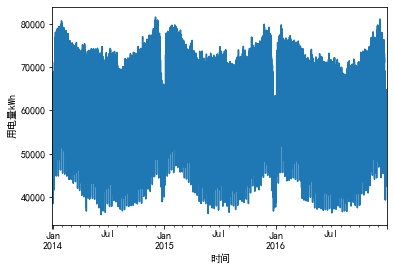

In [7]:
# 原始三年的数据集 2013--2016
de_data['load']['2013-12-31':].plot()
plt.xlabel('时间')
plt.ylabel('用电量kWh')
plt.show()

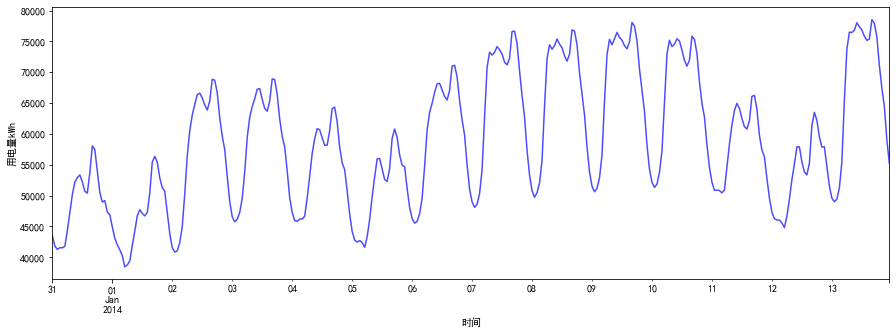

NameError: name 'fig' is not defined

In [35]:
# 原始三年的数据集 2013--2016
de_data['load']['2013-12-31':'2014-01-13'].plot(kind='line', alpha=0.7, use_index =True,figsize =(15,5), color='b')
plt.xlabel('时间')
plt.ylabel('用电量kWh')
plt.show()

Text(2016-11-18 23:00:00, 81000, 'Validation Data')

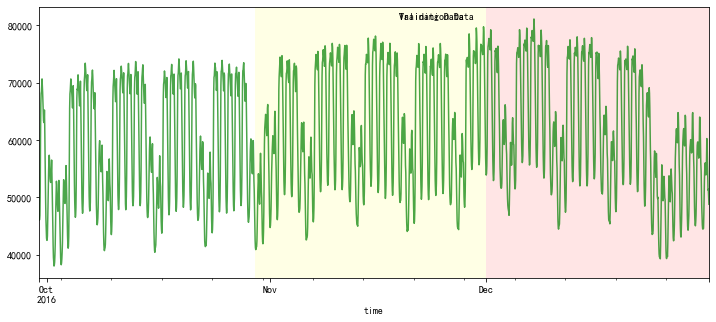

In [8]:
de_data['load']['2016-9-30':'2016-12-31'].resample('1H').last().plot(kind='line', alpha=0.7, use_index =True,figsize =(12,5), color='g')
plt.axvspan('2016-12-01 00:00:00','2016-12-31 23:00:00',facecolor='red', alpha=0.1)
plt.axvspan('2016-10-30 00:00:00','2016-11-30 23:00:00',facecolor='yellow', alpha=0.1)
plt.text('2016-11-18 23:00:00', 81000, 'Training Data')
plt.text('2016-11-18 23:00:00', 81000, 'Validation Data')

# AT dataset

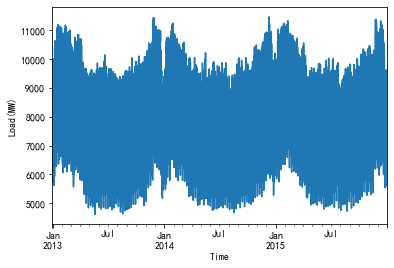

In [6]:
# 选三年的数据 原始图像 2013 2016
at_data['load']['2012-12-31':'2015-12-31'].plot()
plt.xlabel('Time')
plt.ylabel('Load(MW)')
plt.show()

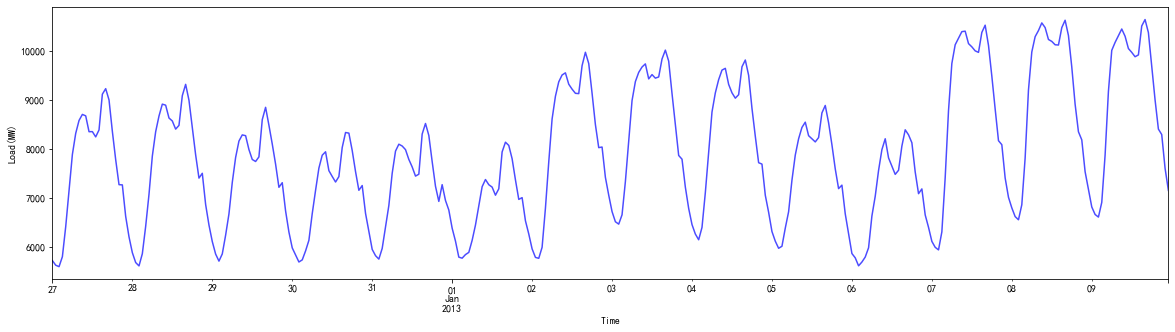

In [29]:
at_data['load']['2012-12-27':'2013-01-09'].plot(kind='line', alpha=0.7, use_index =True,figsize =(20,5), color='b')
plt.xlabel('Time')
plt.ylabel('Load(MW)')
plt.show()

Text(2015-11-18 23:00:00, 11500, 'Validation Data')

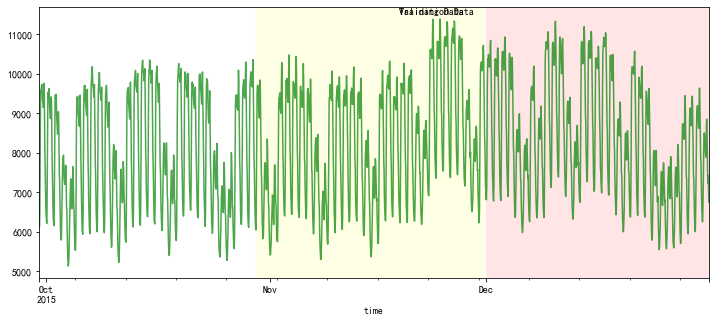

In [7]:
at_data['load']['2015-9-30':'2015-12-31'].resample('1H').last().plot(kind='line', alpha=0.7, use_index =True,figsize =(12,5), color='g')
plt.axvspan('2015-12-01 00:00:00','2015-12-31 23:00:00',facecolor='red', alpha=0.1)
plt.axvspan('2015-10-30 00:00:00','2015-11-30 23:00:00',facecolor='yellow', alpha=0.1)
plt.text('2015-11-18 23:00:00', 11500, 'Training Data')
plt.text('2015-11-18 23:00:00', 11500, 'Validation Data')

In [35]:
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (12, 15),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         # 'xtick.labelsize':'x-large',
         # 'ytick.labelsize':'x-large'
         }
pylab.rcParams.update(params)

# 绘图

In [5]:

plt.rc('font',family='Times New Roman', size=11)
fontdict={'family':'Times New Roman', 'size': 11}

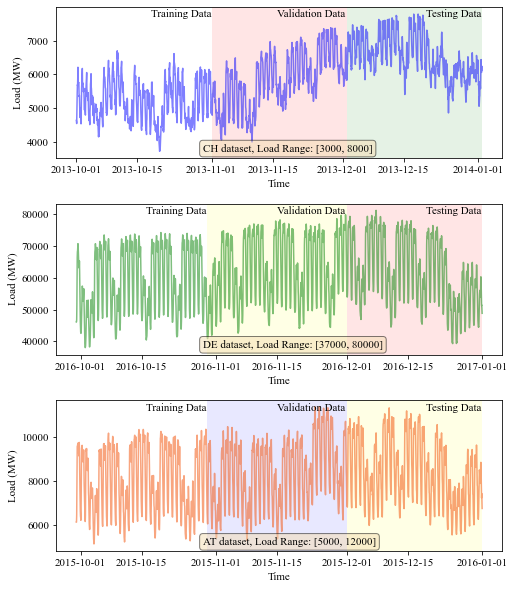

In [10]:
fig = plt.figure(figsize=(8, 10), facecolor='white')
axes_1 = fig.add_subplot(3,1,2)
axes_2 = fig.add_subplot(3,1,1)
axes_3 = fig.add_subplot(3,1,3)

# 绘图 DE
axes_1.plot(de_data['load']['2016-9-30':'2016-12-31'], color='g', alpha=0.5)
axes_1.xaxis.set_major_formatter(mdate.DateFormatter('%Y-%m-%d'))  # 横坐标标签显示的日期格式
# 绘制背景
axes_1.axvspan('2016-12-01 00:00:00','2016-12-31 23:00:00',facecolor='red', alpha=0.1)
axes_1.axvspan('2016-10-30 00:00:00','2016-11-30 23:00:00',facecolor='yellow', alpha=0.1)
# 设置标签
axes_1.set_xlabel('Time',fontdict=fontdict)
axes_1.set_ylabel('Load (MW)', fontdict=fontdict)
# 设置文本备注
axes_1.text(dt.datetime(2016,10,16), 80000, "Training Data",fontdict=fontdict)
axes_1.text(dt.datetime(2016,11,15), 80000, "Validation Data",fontdict=fontdict)
axes_1.text(dt.datetime(2016,12,19), 80000, "Testing Data",fontdict=fontdict)
# 设置 数据集名称
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
axes_1.text(dt.datetime(2016,10,29), 40500, "DE dataset, Load Range: [37000, 80000]", fontdict=fontdict, verticalalignment='top', bbox=props)

# 绘图 CH
axes_2.plot(ch_data['load']['2013-10-01':'2014-01-01'], color='blue', alpha=0.5)
axes_2.xaxis.set_major_formatter(mdate.DateFormatter('%Y-%m-%d'))  # 横坐标标签显示的日期格式
# 绘制背景
axes_2.axvspan(xmin='2013-12-02 00:00:00', xmax='2014-01-01 23:00:00',facecolor='green', alpha=0.1)
axes_2.axvspan(xmin='2013-11-01 00:00:00', xmax='2013-12-01 23:00:00',facecolor='red', alpha=0.1)
# 设置标签
axes_2.set_xlabel('Time', fontdict=fontdict)
axes_2.set_ylabel('Load (MW)', fontdict=fontdict)
# 设置文本备注
axes_2.text(dt.datetime(2013,10,18), 7700, "Training Data",fontdict=fontdict)
axes_2.text(dt.datetime(2013,11,16), 7700, "Validation Data",fontdict=fontdict)
axes_2.text(dt.datetime(2013,12,20), 7700, "Testing Data",fontdict=fontdict)
# 设置 数据集名称
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
axes_2.text(dt.datetime(2013,10,30), 3950, "CH dataset, Load Range: [3000, 8000]", fontdict=fontdict, verticalalignment='top', bbox=props)


# 绘图 AT
axes_3.plot(at_data['load']['2015-9-30':'2015-12-31'], color='#F24C00', alpha=0.5)
axes_3.xaxis.set_major_formatter(mdate.DateFormatter('%Y-%m-%d'))  # 横坐标标签显示的日期格式
# 绘制背景
axes_3.axvspan('2015-12-01 00:00:00','2015-12-31 23:00:00',facecolor='yellow', alpha=0.1)
axes_3.axvspan('2015-10-30 00:00:00','2015-11-30 23:00:00',facecolor='blue', alpha=0.09)
# 设置标签
axes_3.set_xlabel('Time', fontdict=fontdict)
axes_3.set_ylabel('Load (MW)', fontdict=fontdict)
# 设置文本备注
axes_3.text(dt.datetime(2015,10,16), 11200, "Training Data",fontdict=fontdict)
axes_3.text(dt.datetime(2015,11,15), 11200, "Validation Data",fontdict=fontdict)
axes_3.text(dt.datetime(2015,12,19), 11200, "Testing Data",fontdict=fontdict)
# 设置 数据集名称
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
axes_3.text(dt.datetime(2015,10,29), 5450, "AT dataset, Load Range: [5000, 12000]", fontdict=fontdict, verticalalignment='top', bbox=props)

# 设置子图间距
fig.subplots_adjust(left=None,   # 设置画图区域与figure上下左右边框的比例距离
                    bottom=None, 
                    right=None, 
                    top=None,
                    wspace=0,   # 子图间水平方向距离
                    hspace=0.3)     # 子图间垂直方向距离

plt.show()

# fig.savefig('visual_data.eps')
fig.savefig('visual_data.pdf')

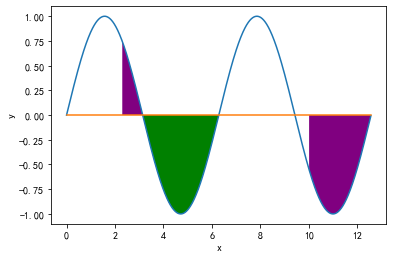

In [122]:
import numpy as np
import matplotlib.pyplot as plt
 
# 生成模拟数据
x = np.arange(0.0, 4.0*np.pi, 0.01)
y = np.sin(x)
 
# 绘制正弦曲线
plt.plot(x, y)
 
# 绘制基准水平直线
plt.plot((x.min(),x.max()), (0,0))
 
# 设置坐标轴标签
plt.xlabel('x')
plt.ylabel('y')
 
# 填充指定区域
plt.fill_between(x,y, where=(2.3<x) & (x<4.3) | (x>10), facecolor='purple')
 
# 可以填充多次
plt.fill_between(x,y,where=(y<0) & (x<8), facecolor='green')
 
plt.show()

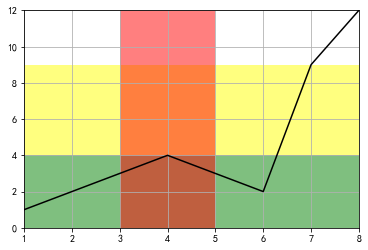

In [133]:
import matplotlib.pyplot as plt

x = [1,2,3,4,5,6,7,8]  #fake data
y = [1,2,3,4,3,2,9,12]

fig, ax = plt.subplots()

ax.plot(x, y, 'k')
ax.grid()
ax.margins(0) # remove default margins (matplotlib verision 2+)

ax.axhspan(0, 4, facecolor='green', alpha=0.5)
ax.axhspan(4, 9, facecolor='yellow', alpha=0.5)
ax.axvspan(3, 5, facecolor='red', alpha=0.5)

plt.show()

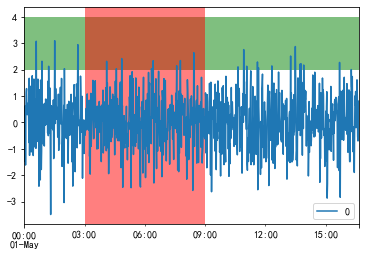

In [68]:
# 构建数据
time_range = pd.date_range('2018-05-01 00:00:00', periods=1000, freq='min')
data = np.random.randn(1000)
df = pd.DataFrame(data, index=time_range)
# 绘图
df.plot()
plt.axhspan(ymin=2, ymax=4, facecolor='green', alpha=0.5)
plt.axvspan(xmin='2018-05-01 03:00',xmax='2018-05-01 09:00', facecolor='red', alpha=0.5)